In [ ]:
#Suhruta Malireddy (18BCD7003) and K L Prathyusha (18BCD7024)
#Spotify Popularity Prediction Notebook
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd #importing needed libraries

In [ ]:
df=pd.read_csv("data.csv") #reading the csv
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [ ]:
#Section 1:
df.dtypes #we have float, int and object (string) types

valence             float64
year                  int64
acousticness        float64
artists              object
danceability        float64
duration_ms           int64
energy              float64
explicit              int64
id                   object
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
name                 object
popularity            int64
release_date         object
speechiness         float64
tempo               float64
dtype: object

In [ ]:
df = df.drop(labels=['id', 'name', 'release_date'], axis=1)
#id and name too unique and not useful for identification. Release date and year are dependent, so we remove one.
df.shape

(170653, 16)

In [ ]:
df['popornot'] = np.where(df.popularity > 50, 0, 1) #making it two classes, popular/not
df

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,popornot
0,0.0594,1921,0.98200,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,0.878000,10,0.6650,-20.096,1,4,0.0366,80.954,1
1,0.9630,1921,0.73200,['Dennis Day'],0.819,180533,0.341,0,0.000000,7,0.1600,-12.441,1,5,0.4150,60.936,1
2,0.0394,1921,0.96100,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,0.913000,3,0.1010,-14.850,1,5,0.0339,110.339,1
3,0.1650,1921,0.96700,['Frank Parker'],0.275,210000,0.309,0,0.000028,5,0.3810,-9.316,1,3,0.0354,100.109,1
4,0.2530,1921,0.95700,['Phil Regan'],0.418,166693,0.193,0,0.000002,3,0.2290,-10.096,1,2,0.0380,101.665,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,0.6080,2020,0.08460,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",0.786,301714,0.808,0,0.000289,7,0.0822,-3.702,1,72,0.0881,105.029,0
170649,0.7340,2020,0.20600,['Ashnikko'],0.717,150654,0.753,0,0.000000,7,0.1010,-6.020,1,68,0.0605,137.936,0
170650,0.6370,2020,0.10100,['MAMAMOO'],0.634,211280,0.858,0,0.000009,4,0.2580,-2.226,0,76,0.0809,91.688,0
170651,0.1950,2020,0.00998,['Eminem'],0.671,337147,0.623,1,0.000008,2,0.6430,-7.161,1,70,0.3080,75.055,0


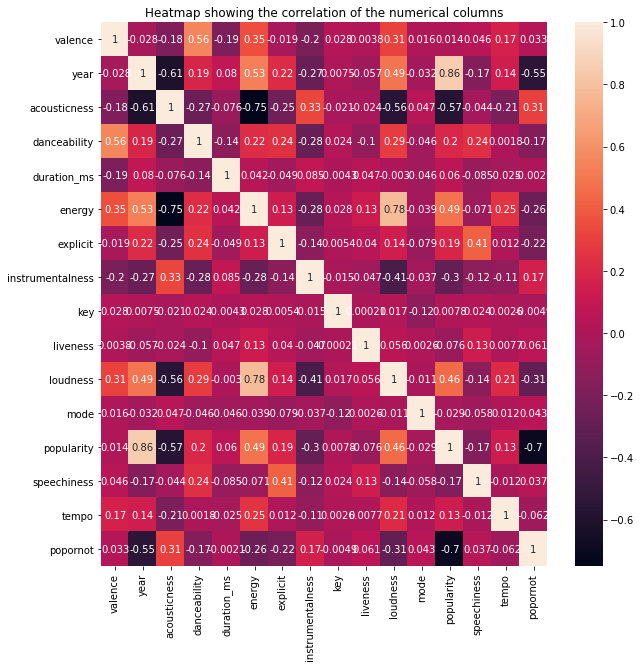

In [ ]:
#Section 2: Data Visualisation
fig, ax = plt.subplots(figsize=(10,10)) #plotting correlations via a heatmap
plt.title('Heatmap showing the correlation of the numerical columns')
sns.heatmap(df.corr(),annot=True)

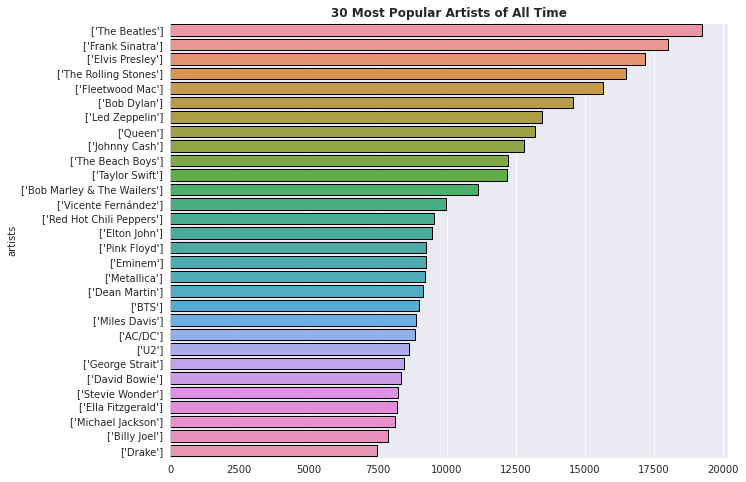

In [ ]:
fig, ax = plt.subplots(figsize = (10, 8))
lead_artists = df.groupby('artists')['popularity'].sum().sort_values(ascending=False).head(30)
#plotting the top 20 artists via a barplot
ax = sns.barplot(x=lead_artists.values, y=lead_artists.index, edgecolor='black')
ax.set_title('30 Most Popular Artists of All Time',  weight = 'bold')
plt.show()
#please see screenshot of our timeseries in the word doc. It was throwing errors on colab, so we had to use a kaggle notebook.

[Text(0.5, 1.0, 'Comparing number of tracks that are explicit/not')]

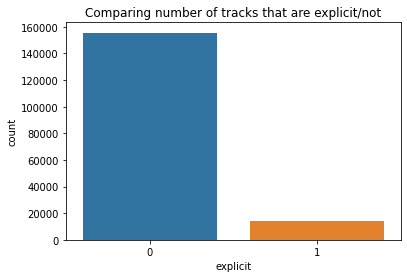

In [ ]:
sns.countplot(data=df, x = 'explicit').set(title= 'Comparing number of tracks that are explicit/not')#1=yes,0=no. 
#Could be an important factor leading to popularity.

Text(0.5, 1.0, 'Popularity Based on Key')

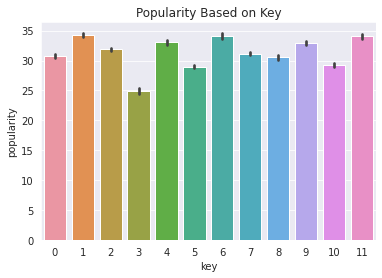

In [ ]:
sns.barplot(x = 'key', y = 'popularity', data = df)
plt.title('Popularity Based on Key')


Text(0.5, 1.0, 'Popularity Based on Key')

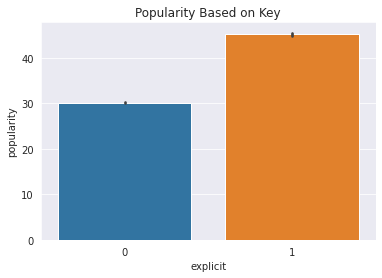

In [ ]:
sns.barplot(x = 'explicit', y = 'popularity', data = df)
plt.title('Popularity Based on Key') 


In [ ]:
#section 3: non mandatory preprocessing
df.isnull().sum() #no nulls exist

valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
dtype: int64

In [ ]:
df.duplicated().sum() #seeing if any duplicates

628

In [ ]:
df = df[~df.duplicated()==1]
df.duplicated().sum() #verifying no duplicates exist 

0

In [ ]:
df['popornot'].value_counts()

1    133757
0     36268
Name: popornot, dtype: int64

In [ ]:

from sklearn.utils import resample

df_majority = df[df.popornot==1]
df_minority = df[df.popornot==0]
 
# Downsample majority class 
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=36268,     # to match minority class
                                 random_state=42) # reproducible results
 
# Combine minority class with downsampled majority class
df_ds = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
df_ds.popornot.value_counts()

1    36268
0    36268
Name: popornot, dtype: int64

In [ ]:
from sklearn.utils import resample

df_majority = df[df.popornot==1]
df_minority = df[df.popornot==0]
 
# Upsampled majority class 
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples=133757,     # to match majority class
                                 random_state=42) # reproducible results
 
# Combine maj class with upsampled minority class
df_us = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_us.popornot.value_counts()

1    133757
0    133757
Name: popornot, dtype: int64

In [ ]:

dfohe=df_ds.copy()
dfohe=pd.get_dummies(dfohe,columns=['explicit','mode','key'])
dfohe.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,instrumentalness,liveness,loudness,popularity,speechiness,tempo,popornot,explicit_0,explicit_1,mode_0,mode_1,key_0,key_1,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11
168754,0.434,2011,0.8200,"['Tony Bennett', 'John Mayer']",0.573,176013,0.324,0.000000,0.0618,-10.999,50,0.0390,100.416,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
10775,0.466,1975,0.0469,['Black Sabbath'],0.279,389095,0.638,0.057200,0.1410,-12.569,46,0.0449,178.273,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
48713,0.263,1977,0.2760,['Donna Summer'],0.545,265733,0.229,0.000003,0.1320,-16.205,42,0.0298,121.716,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
156719,0.943,1950,0.9430,['Vasilis Skaliotis'],0.447,161333,0.458,0.277000,0.3370,-6.389,0,0.0470,105.785,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
83543,0.218,1976,0.0593,['Aerosmith'],0.171,196667,0.512,0.000124,0.0710,-8.896,34,0.0290,78.975,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
dfohe['artists'] = dfohe.artists.astype('category')  #label encoding
dfohe['artists'] = dfohe['artists'].cat.codes
dfohe

,valence,year,acousticness,artists,danceability,duration_ms,energy,instrumentalness,liveness,loudness,popularity,speechiness,tempo,popornot,explicit_0,explicit_1,mode_0,mode_1,key_0,key_1,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11
168754,0.434,2011,0.82000,19904,0.573,176013,0.324,0.000000,0.0618,-10.999,50,0.0390,100.416,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
10775,0.466,1975,0.04690,2460,0.279,389095,0.638,0.057200,0.1410,-12.569,46,0.0449,178.273,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
48713,0.263,1977,0.27600,5148,0.545,265733,0.229,0.000003,0.1320,-16.205,42,0.0298,121.716,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
156719,0.943,1950,0.94300,20443,0.447,161333,0.458,0.277000,0.3370,-6.389,0,0.0470,105.785,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
83543,0.218,1976,0.05930,667,0.171,196667,0.512,0.000124,0.0710,-8.896,34,0.0290,78.975,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,0.608,2020,0.08460,1365,0.786,301714,0.808,0.000289,0.0822,-3.702,72,0.0881,105.029,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
170649,0.734,2020,0.20600,1573,0.717,150654,0.753,0.000000,0.1010,-6.020,68,0.0605,137.936,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
170650,0.637,2020,0.10100,12459,0.634,211280,0.858,0.000009,0.2580,-2.226,76,0.0809,91.688,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
170651,0.195,2020,0.00998,5802,0.671,337147,0.623,0.000008,0.6430,-7.161,70,0.3080,75.055,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
dfohe['artists'] = dfohe.artists.astype('int64')

In [ ]:
val_int=[]
val_others=[]
for col in dfohe.columns:
  if dfohe[col].dtype=='int64' or dfohe[col].dtype=='float64' :
    val_int.append(col)
  else:
    val_others.append(col)

print(val_int) #seperating int columns to normalise
print(val_others)


['valence', 'year', 'acousticness', 'artists', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'popularity', 'speechiness', 'tempo', 'popornot']
['explicit_0', 'explicit_1', 'mode_0', 'mode_1', 'key_0', 'key_1', 'key_2', 'key_3', 'key_4', 'key_5', 'key_6', 'key_7', 'key_8', 'key_9', 'key_10', 'key_11']


In [ ]:
from sklearn import preprocessing
x=dfohe[val_int]
dfohe=dfohe.drop(val_int, axis=1)
min_max_scaler=preprocessing.MinMaxScaler()
x_val = min_max_scaler.fit_transform(x) #normalising via minmax scaler

dffinal=pd.DataFrame(x_val,columns=val_int)
dfnormal=pd.concat([dffinal, dfohe], axis=1)
dfnormal

,valence,year,acousticness,artists,danceability,duration_ms,energy,instrumentalness,liveness,loudness,popularity,speechiness,tempo,popornot,explicit_0,explicit_1,mode_0,mode_1,key_0,key_1,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11
0,0.435743,0.909091,0.823293,0.910438,0.579960,0.040078,0.324,0.000000,0.061986,0.798816,0.50,0.040248,0.412374,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.467871,0.545455,0.047088,0.112524,0.282389,0.090047,0.638,0.057200,0.141424,0.773222,0.46,0.046336,0.732106,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.264056,0.565657,0.277108,0.235477,0.551619,0.061118,0.229,0.000003,0.132397,0.713948,0.42,0.030753,0.499846,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.946787,0.292929,0.946787,0.935093,0.452429,0.036636,0.458,0.277000,0.338014,0.873969,0.00,0.048504,0.434423,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.218876,0.555556,0.059538,0.030510,0.173077,0.044922,0.512,0.000124,0.071214,0.833100,0.34,0.029928,0.324323,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
170649,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
170650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
170651,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
dffinal=dfnormal.round(decimals=5)

In [ ]:
dff=dffinal.dropna()


In [ ]:
#ALGOS

from sklearn.model_selection import train_test_split
dff = dff.drop(labels=['popularity'], axis=1)
#df = df.drop(labels=['artists','popularity'], axis=1)
y = dff['popornot']
dff=dff.drop(columns=['popornot'])


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dff, y, train_size=0.8, random_state=42)

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, roc_auc_score
def print_score(clf, X_train, X_test, y_train, y_test, train=True):
    '''
    v0.1 Follow the scikit learn library format in terms of input
    print the accuracy score, classification report and confusion matrix of classifier
    '''
    lb = preprocessing.LabelBinarizer()
    lb.fit(y_train)
    if train:
        '''
        training performance
        '''
        res = clf.predict(X_train)
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, 
                                                                res)))
        print("Classification Report: \n {}\n".format(classification_report(y_train, 
                                                                            res)))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, 
                                                                  res)))
        print("ROC AUC: {0:.4f}\n".format(roc_auc_score(lb.transform(y_train), 
                                                      lb.transform(res))))

        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        
    elif train==False:
        '''
        test performance
        '''
        res_test = clf.predict(X_test)
        print("Test Result:\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, 
                                                                res_test)))
        print("Classification Report: \n {}\n".format(classification_report(y_test, 
                                                                            res_test)))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, 
                                                                  res_test)))   
        print("ROC AUC: {0:.4f}\n".format(roc_auc_score(lb.transform(y_test), 
                                                      lb.transform(res_test))))

In [ ]:
#knn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5,p=2, metric='minkowski') #using minkowski distance
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
print_score(knn, X_train, X_test, y_train, y_test, train=True) #THIS IS ORIGINAL, 100 x 100
print_score(knn, X_train, X_test, y_train, y_test, train=False)

Train Result:

accuracy score: 0.3102



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report: 
               precision    recall  f1-score   support

           0       0.50      0.98      0.66     22222
           1       0.27      0.24      0.25      2312
           2       0.22      0.22      0.22      1396
           3       0.20      0.19      0.19      1172
           4       0.20      0.21      0.21       877
           5       0.19      0.21      0.20       818
           6       0.18      0.18      0.18       812
           7       0.17      0.20      0.18       894
           8       0.20      0.22      0.21       886
           9       0.19      0.24      0.21       973
          10       0.18      0.20      0.19       950
          11       0.18      0.20      0.19       941
          12       0.19      0.23      0.21       926
          13       0.19      0.23      0.21      1008
          14       0.17      0.18      0.17       992
          15       0.17      0.17      0.17       982
          16       0.18      0.18      0.18       963
  

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Average Accuracy: 	 0.1496
Accuracy SD: 		 0.0011
Test Result:

accuracy score: 0.1534

Classification Report: 
               precision    recall  f1-score   support

           0       0.43      0.85      0.57      5670
           1       0.04      0.04      0.04       564
           2       0.01      0.01      0.01       337
           3       0.01      0.01      0.01       295
           4       0.03      0.03      0.03       237
           5       0.02      0.02      0.02       200
           6       0.01      0.01      0.01       205
           7       0.01      0.01      0.01       222
           8       0.01      0.01      0.01       242
           9       0.00      0.00      0.00       240
          10       0.00      0.00      0.00       246
          11       0.02      0.02      0.02       230
          12       0.02      0.02      0.02       238
          13       0.01      0.01      0.01       241
          14       0.01      0.01      0.01       231
          15       0.0

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ValueError: ignored

In [ ]:
print_score(knn, X_train, X_test, y_train, y_test, train=True) #THIS is modified
print_score(knn, X_train, X_test, y_train, y_test, train=False)

Train Result:

accuracy score: 0.8307

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.80      0.81      0.81     12424
         1.0       0.85      0.85      0.85     16175

    accuracy                           0.83     28599
   macro avg       0.83      0.83      0.83     28599
weighted avg       0.83      0.83      0.83     28599


Confusion Matrix: 
 [[10064  2360]
 [ 2483 13692]]

ROC AUC: 0.8283

Average Accuracy: 	 0.7464
Accuracy SD: 		 0.0091
Test Result:

accuracy score: 0.7501

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.71      0.72      0.71      3089
         1.0       0.78      0.77      0.78      4061

    accuracy                           0.75      7150
   macro avg       0.75      0.75      0.75      7150
weighted avg       0.75      0.75      0.75      7150


Confusion Matrix: 
 [[2226  863]
 [ 924 3137]]

ROC AUC: 0.7465



In [ ]:
#DT
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
print_score(dt, X_train, X_test, y_train, y_test, train=True)
print_score(dt, X_train, X_test, y_train, y_test, train=False)

Train Result:

accuracy score: 0.9999

Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     12424
         1.0       1.00      1.00      1.00     16175

    accuracy                           1.00     28599
   macro avg       1.00      1.00      1.00     28599
weighted avg       1.00      1.00      1.00     28599


Confusion Matrix: 
 [[12424     0]
 [    2 16173]]

ROC AUC: 0.9999

Average Accuracy: 	 0.7353
Accuracy SD: 		 0.0088
Test Result:

accuracy score: 0.7330

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.69      0.70      0.69      3089
         1.0       0.77      0.76      0.76      4061

    accuracy                           0.73      7150
   macro avg       0.73      0.73      0.73      7150
weighted avg       0.73      0.73      0.73      7150


Confusion Matrix: 
 [[2174  915]
 [ 994 3067]]

ROC AUC: 0.7295



In [ ]:
from sklearn.linear_model import SGDClassifier #sgd classifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
sgdc = make_pipeline(StandardScaler(),SGDClassifier(max_iter=1000, tol=1e-3))
sgdc.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('sgdclassifier',
                 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='hinge',
                               max_iter=1000, n_iter_no_change=5, n_jobs=None,
                               penalty='l2', power_t=0.5, random_state=None,
                               shuffle=True, tol=0.001, validation_fraction=0.1,
                               verbose=0, warm_start=False))],
         verbose=False)

In [ ]:
print_score(sgdc, X_train, X_test, y_train, y_test, train=True)
print_score(sgdc, X_train, X_test, y_train, y_test, train=False)

Train Result:

accuracy score: 0.7813

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.75      0.75      0.75     12424
         1.0       0.81      0.81      0.81     16175

    accuracy                           0.78     28599
   macro avg       0.78      0.78      0.78     28599
weighted avg       0.78      0.78      0.78     28599


Confusion Matrix: 
 [[ 9267  3157]
 [ 3097 13078]]

ROC AUC: 0.7772

Average Accuracy: 	 0.7782
Accuracy SD: 		 0.0067
Test Result:

accuracy score: 0.7792

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.74      0.74      0.74      3089
         1.0       0.81      0.81      0.81      4061

    accuracy                           0.78      7150
   macro avg       0.78      0.77      0.77      7150
weighted avg       0.78      0.78      0.78      7150


Confusion Matrix: 
 [[2299  790]
 [ 789 3272]]

ROC AUC: 0.7750



In [ ]:
#rfc
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50,n_jobs=-1);
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [ ]:
print_score(rfc, X_train, X_test, y_train, y_test, train=True)
print_score(rfc, X_train, X_test, y_train, y_test, train=False)

Train Result:

accuracy score: 0.9998

Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     12424
         1.0       1.00      1.00      1.00     16175

    accuracy                           1.00     28599
   macro avg       1.00      1.00      1.00     28599
weighted avg       1.00      1.00      1.00     28599


Confusion Matrix: 
 [[12423     1]
 [    4 16171]]

ROC AUC: 0.9998

Average Accuracy: 	 0.7993
Accuracy SD: 		 0.0056
Test Result:

accuracy score: 0.7994

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.79      0.73      0.76      3089
         1.0       0.80      0.86      0.83      4061

    accuracy                           0.80      7150
   macro avg       0.80      0.79      0.79      7150
weighted avg       0.80      0.80      0.80      7150


Confusion Matrix: 
 [[2240  849]
 [ 585 3476]]

ROC AUC: 0.7906



In [ ]:
#logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=1, max_iter=500)
lr.fit(X_train, y_train) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print_score(lr, X_train, X_test, y_train, y_test, train=True)
print_score(lr, X_train, X_test, y_train, y_test, train=False)

Train Result:

accuracy score: 0.7833

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.75      0.76      0.75     12424
         1.0       0.81      0.80      0.81     16175

    accuracy                           0.78     28599
   macro avg       0.78      0.78      0.78     28599
weighted avg       0.78      0.78      0.78     28599


Confusion Matrix: 
 [[ 9427  2997]
 [ 3200 12975]]

ROC AUC: 0.7805

Average Accuracy: 	 0.7828
Accuracy SD: 		 0.0063
Test Result:

accuracy score: 0.7787

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.74      0.75      0.75      3089
         1.0       0.81      0.80      0.80      4061

    accuracy                           0.78      7150
   macro avg       0.77      0.78      0.78      7150
weighted avg       0.78      0.78      0.78      7150


Confusion Matrix: 
 [[2324  765]
 [ 817 3244]]

ROC AUC: 0.7756



In [ ]:
#ensemble
#bagging w DT
from sklearn.ensemble import BaggingClassifier
bag_clf = BaggingClassifier(base_estimator=dt, n_estimators=100,bootstrap=True, oob_score=True,n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train) #implementing bagging

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,


In [ ]:
print_score(bag_clf, X_train, X_test, y_train, y_test, train=True)
print_score(bag_clf, X_train, X_test, y_train, y_test, train=False)

Train Result:

accuracy score: 0.9999

Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     12424
         1.0       1.00      1.00      1.00     16175

    accuracy                           1.00     28599
   macro avg       1.00      1.00      1.00     28599
weighted avg       1.00      1.00      1.00     28599


Confusion Matrix: 
 [[12424     0]
 [    2 16173]]

ROC AUC: 0.9999

Average Accuracy: 	 0.8007
Accuracy SD: 		 0.0038
Test Result:

accuracy score: 0.8024

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.79      0.73      0.76      3089
         1.0       0.81      0.85      0.83      4061

    accuracy                           0.80      7150
   macro avg       0.80      0.79      0.80      7150
weighted avg       0.80      0.80      0.80      7150


Confusion Matrix: 
 [[2267  822]
 [ 591 3470]]

ROC AUC: 0.7942



In [ ]:
#adaboost
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=30,learning_rate=1)
ada.fit(X_train, y_train)


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
                   n_estimators=30, random_state=None)

In [ ]:
print_score(ada, X_train, X_test, y_train, y_test, train=True)
print_score(ada, X_train, X_test, y_train, y_test, train=False)

Train Result:

accuracy score: 0.7941

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.82      0.68      0.74     12424
         1.0       0.78      0.88      0.83     16175

    accuracy                           0.79     28599
   macro avg       0.80      0.78      0.78     28599
weighted avg       0.80      0.79      0.79     28599


Confusion Matrix: 
 [[ 8400  4024]
 [ 1864 14311]]

ROC AUC: 0.7804

Average Accuracy: 	 0.7936
Accuracy SD: 		 0.0059
Test Result:

accuracy score: 0.7924

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.81      0.67      0.74      3089
         1.0       0.78      0.88      0.83      4061

    accuracy                           0.79      7150
   macro avg       0.80      0.78      0.78      7150
weighted avg       0.79      0.79      0.79      7150


Confusion Matrix: 
 [[2082 1007]
 [ 477 3584]]

ROC AUC: 0.7783



In [ ]:
from sklearn.ensemble import AdaBoostClassifier
bclf = AdaBoostClassifier(base_estimator=rfc,n_estimators=rfc.n_estimators) #using random forest obj as base classifier
bclf.fit(X_train, y_train)


AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         max_samples=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                       

In [ ]:
print_score(bclf, X_train, X_test, y_train, y_test, train=True)
print_score(bclf, X_train, X_test, y_train, y_test, train=False)

Train Result:

accuracy score: 0.9999

Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     12424
         1.0       1.00      1.00      1.00     16175

    accuracy                           1.00     28599
   macro avg       1.00      1.00      1.00     28599
weighted avg       1.00      1.00      1.00     28599


Confusion Matrix: 
 [[12423     1]
 [    1 16174]]

ROC AUC: 0.9999

Average Accuracy: 	 0.7985
Accuracy SD: 		 0.0059
Test Result:

accuracy score: 0.7989

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.80      0.72      0.76      3089
         1.0       0.80      0.86      0.83      4061

    accuracy                           0.80      7150
   macro avg       0.80      0.79      0.79      7150
weighted avg       0.80      0.80      0.80      7150


Confusion Matrix: 
 [[2219  870]
 [ 568 3493]]

ROC AUC: 0.7892



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
print_score(clf, X_train, X_test, y_train, y_test, train=True)
print_score(clf, X_train, X_test, y_train, y_test, train=False)

Train Result:

accuracy score: 0.8103

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.81      0.73      0.77     12424
         1.0       0.81      0.87      0.84     16175

    accuracy                           0.81     28599
   macro avg       0.81      0.80      0.80     28599
weighted avg       0.81      0.81      0.81     28599


Confusion Matrix: 
 [[ 9064  3360]
 [ 2066 14109]]

ROC AUC: 0.8009

Average Accuracy: 	 0.8048
Accuracy SD: 		 0.0048
Test Result:

accuracy score: 0.8046

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.80      0.73      0.76      3089
         1.0       0.81      0.86      0.83      4061

    accuracy                           0.80      7150
   macro avg       0.80      0.80      0.80      7150
weighted avg       0.80      0.80      0.80      7150


Confusion Matrix: 
 [[2241  848]
 [ 549 3512]]

ROC AUC: 0.7951



In [ ]:
#xgboost
import xgboost as xgb
xg_reg = xgb.XGBClassifier()
xg_reg.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
print_score(xg_reg, X_train, X_test, y_train, y_test, train=True)
print_score(xg_reg, X_train, X_test, y_train, y_test, train=False)

Train Result:

accuracy score: 0.8081

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.81      0.72      0.77     12424
         1.0       0.80      0.87      0.84     16175

    accuracy                           0.81     28599
   macro avg       0.81      0.80      0.80     28599
weighted avg       0.81      0.81      0.81     28599


Confusion Matrix: 
 [[ 9007  3417]
 [ 2071 14104]]

ROC AUC: 0.7985

Average Accuracy: 	 0.8038
Accuracy SD: 		 0.0051
Test Result:

accuracy score: 0.8048

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.81      0.72      0.76      3089
         1.0       0.80      0.87      0.83      4061

    accuracy                           0.80      7150
   macro avg       0.80      0.79      0.80      7150
weighted avg       0.80      0.80      0.80      7150


Confusion Matrix: 
 [[2230  859]
 [ 537 3524]]

ROC AUC: 0.7948



In [ ]:
#stacking
#meta
train_pred1=pd.DataFrame(dt.predict(X_train));#dt
test_pred1=pd.DataFrame(dt.predict(X_test));

In [ ]:
#rfc
train_pred2=pd.DataFrame(rfc.predict(X_train));
test_pred2=pd.DataFrame(rfc.predict(X_test));

In [ ]:
st = pd.concat([train_pred1, train_pred2], axis=1)
st_test = pd.concat([test_pred1, test_pred2], axis=1) #using both calculated above

lr.fit(st,y_train) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print_score(lr, st, st_test, y_train, y_test, train=True)
print_score(lr, st , st_test, y_train, y_test, train=False)

Train Result:

accuracy score: 0.9999

Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     12424
         1.0       1.00      1.00      1.00     16175

    accuracy                           1.00     28599
   macro avg       1.00      1.00      1.00     28599
weighted avg       1.00      1.00      1.00     28599


Confusion Matrix: 
 [[12424     0]
 [    2 16173]]

ROC AUC: 0.9999

Average Accuracy: 	 0.9999
Accuracy SD: 		 0.0001
Test Result:

accuracy score: 0.7330

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.69      0.70      0.69      3089
         1.0       0.77      0.76      0.76      4061

    accuracy                           0.73      7150
   macro avg       0.73      0.73      0.73      7150
weighted avg       0.73      0.73      0.73      7150


Confusion Matrix: 
 [[2174  915]
 [ 994 3067]]

ROC AUC: 0.7295



In [ ]:
#single with rfc, adaboost and bagging (didn't run, see output below)
abc = AdaBoostClassifier(base_estimator=rfc, n_estimators=rfc.n_estimators,learning_rate=1) #ada with rfc base
abc.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         max_samples=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                       

In [ ]:
bag = BaggingClassifier(base_estimator=abc, n_estimators=100,bootstrap=True, oob_score=True,n_jobs=-1, random_state=42)
bag.fit(X_train, y_train)

TerminatedWorkerError: ignored